You can use `google.colab.files.upload()` to upload files from your local file system to the Colab runtime environment. After execution, a file picker will appear, allowing you to select and upload your file(s).

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


Saving noc_regions.csv to noc_regions.csv
Saving athlete_events.csv to athlete_events.csv
User uploaded file "noc_regions.csv" with length 3595 bytes
User uploaded file "athlete_events.csv" with length 41500688 bytes


# Task
Upload the Olympics dataset.

## Obtain Olympics Data

### Subtask:
Acquire the Olympics dataset by uploading it from your local machine.


**Reasoning**:
The subtask is to acquire the Olympics dataset by uploading it. The previous code block already uses `google.colab.files.upload()` to facilitate this. Executing this cell will prompt the user to upload the file.



In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

## Load and Initial Data Inspection

### Subtask:
Load the obtained Olympics data into pandas DataFrames. Display the first few rows, check data types, and get a summary of the dataset to understand its structure and content.


**Reasoning**:
The subtask requires loading two CSV files into pandas DataFrames, displaying their heads, and printing their info summaries to understand their structure and content.



In [3]:
import pandas as pd

df_athletes = pd.read_csv('athlete_events.csv')
df_regions = pd.read_csv('noc_regions.csv')

print('First 5 rows of df_athletes:')
print(df_athletes.head())
print('\nFirst 5 rows of df_regions:')
print(df_regions.head())

print('\nInfo for df_athletes:')
df_athletes.info()
print('\nInfo for df_regions:')
df_regions.info()

First 5 rows of df_athletes:
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN

## Data Cleaning and Preprocessing

### Subtask:
Perform necessary data cleaning steps, including handling missing values and merging datasets.


**Reasoning**:
The first step is to handle missing values in the 'Medal' column of `df_athletes` by filling them with 'No Medal' as per the instructions.



In [4]:
df_athletes['Medal'].fillna('No Medal', inplace=True)
print("Missing values in 'Medal' column after imputation:")
print(df_athletes['Medal'].isnull().sum())

Missing values in 'Medal' column after imputation:
0


/tmp/ipython-input-4266498676.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_athletes['Medal'].fillna('No Medal', inplace=True)


**Reasoning**:
The previous step successfully filled missing 'Medal' values but generated a FutureWarning due to `inplace=True`. To prevent this warning and maintain best practices, I will reapply the 'Medal' imputation without `inplace=True` and proceed with the remaining data cleaning steps: filling missing numerical values in `df_athletes` with medians, filling categorical missing values in `df_regions`, checking all missing values, and finally merging the two DataFrames as instructed.



In [5]:
df_athletes['Medal'] = df_athletes['Medal'].fillna('No Medal')

# Fill missing numerical values in df_athletes with medians
df_athletes['Age'] = df_athletes['Age'].fillna(df_athletes['Age'].median())
df_athletes['Height'] = df_athletes['Height'].fillna(df_athletes['Height'].median())
df_athletes['Weight'] = df_athletes['Weight'].fillna(df_athletes['Weight'].median())

# Fill missing values in df_regions
df_regions['region'] = df_regions['region'].fillna('Unknown')
df_regions['notes'] = df_regions['notes'].fillna('None')

# Check missing values after imputation
print('Missing values in df_athletes after imputation:')
print(df_athletes.isnull().sum())
print('\nMissing values in df_regions after imputation:')
print(df_regions.isnull().sum())

# Merge df_athletes and df_regions
df_merged = pd.merge(df_athletes, df_regions, on='NOC', how='left')

print('\nFirst 5 rows of df_merged:')
print(df_merged.head())
print('\nInfo for df_merged:')
df_merged.info()


Missing values in df_athletes after imputation:
ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

Missing values in df_regions after imputation:
NOC       0
region    0
notes     0
dtype: int64

First 5 rows of df_merged:
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0   175.0    70.0         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0   175.0    70.0  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London 

## Exploratory Data Analysis (EDA) and Visualization

### Subtask:
Conduct exploratory data analysis to identify key trends and patterns in the Olympics data. This will involve calculating statistics (e.g., total medals per country, medal distribution over time) and generating visualizations (e.g., bar charts, line plots, heatmaps) to highlight interesting insights. Ensure plots have legends.


**Reasoning**:
The first step in the EDA is to calculate the total number of medals won by each country (region). This involves filtering out 'No Medal' entries, grouping by 'region', and counting the number of medals. Finally, the top 10 countries will be displayed.



In [6]:
medals_per_country = df_merged[df_merged['Medal'] != 'No Medal'].groupby('region')['Medal'].count().sort_values(ascending=False)

print("Top 10 Countries by Total Medals:")
print(medals_per_country.head(10))

Top 10 Countries by Total Medals:
region
USA          5637
Russia       3947
Germany      3756
UK           2068
France       1777
Italy        1637
Sweden       1536
Canada       1352
Australia    1349
Hungary      1135
Name: Medal, dtype: int64


**Reasoning**:
The next step is to visualize the top 10 countries by total medals using a bar chart, as instructed in the subtask. This will provide a clear visual representation of the data calculated in the previous step.



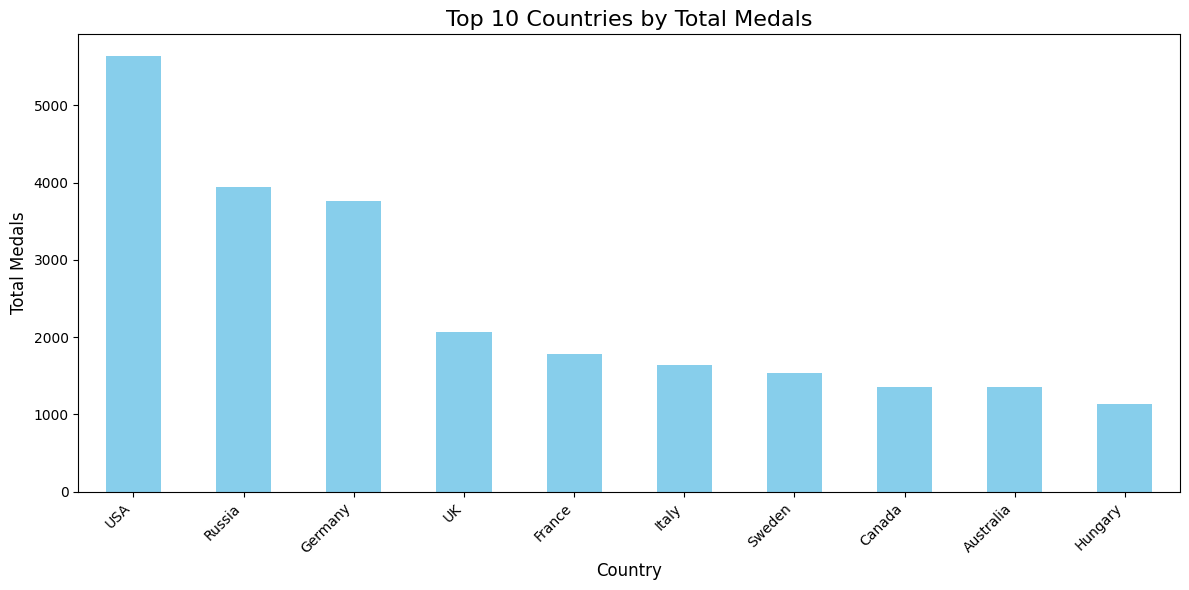

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
medals_per_country.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Medals', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Medals', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
As per the instructions, the next step is to analyze the medal distribution over time by grouping the merged DataFrame by 'Year' and 'Medal' type and then counting the occurrences of each medal. This will prepare the data for time-series visualization.



In [8]:
medal_distribution_over_time = df_merged.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

print("Medal distribution over time (first 5 rows):")
print(medal_distribution_over_time.head())

Medal distribution over time (first 5 rows):
Medal  Bronze  Gold  No Medal  Silver
Year                                 
1896       38    62       237      43
1900      175   201      1332     228
1904      150   173       815     163
1906      145   157      1275     156
1908      256   294      2270     281


**Reasoning**:
The next step is to create a line plot showing the trend of Gold, Silver, and Bronze medals over the years, as instructed in the subtask. This will exclude the 'No Medal' category and include appropriate labels and a legend.



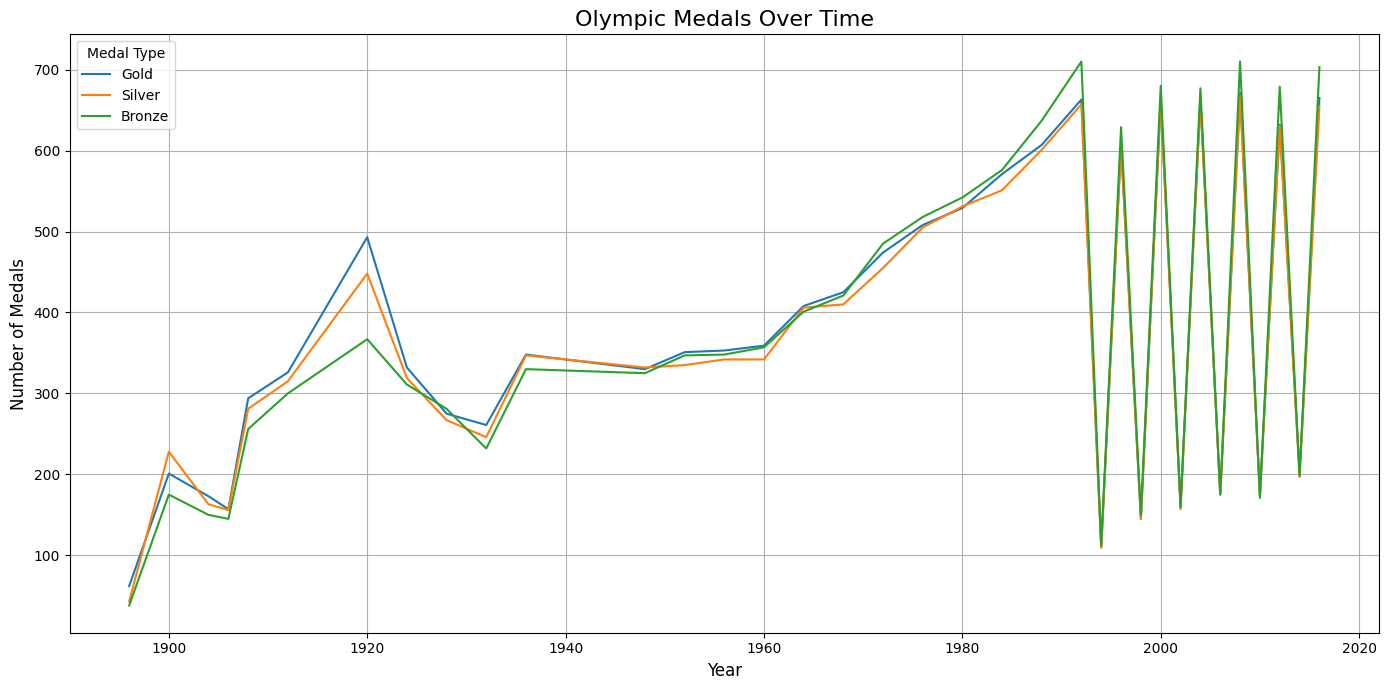

In [9]:
plt.figure(figsize=(14, 7))
medal_distribution_over_time[['Gold', 'Silver', 'Bronze']].plot(kind='line', ax=plt.gca())
plt.title('Olympic Medals Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.legend(title='Medal Type')
plt.grid(True)
plt.tight_layout()
plt.show()

**Reasoning**:
The next step is to investigate the distribution of 'Age', 'Height', and 'Weight' among athletes by creating histograms for each of these numerical columns from the merged DataFrame, as per the subtask instructions. This will help understand the characteristics of the athlete population.



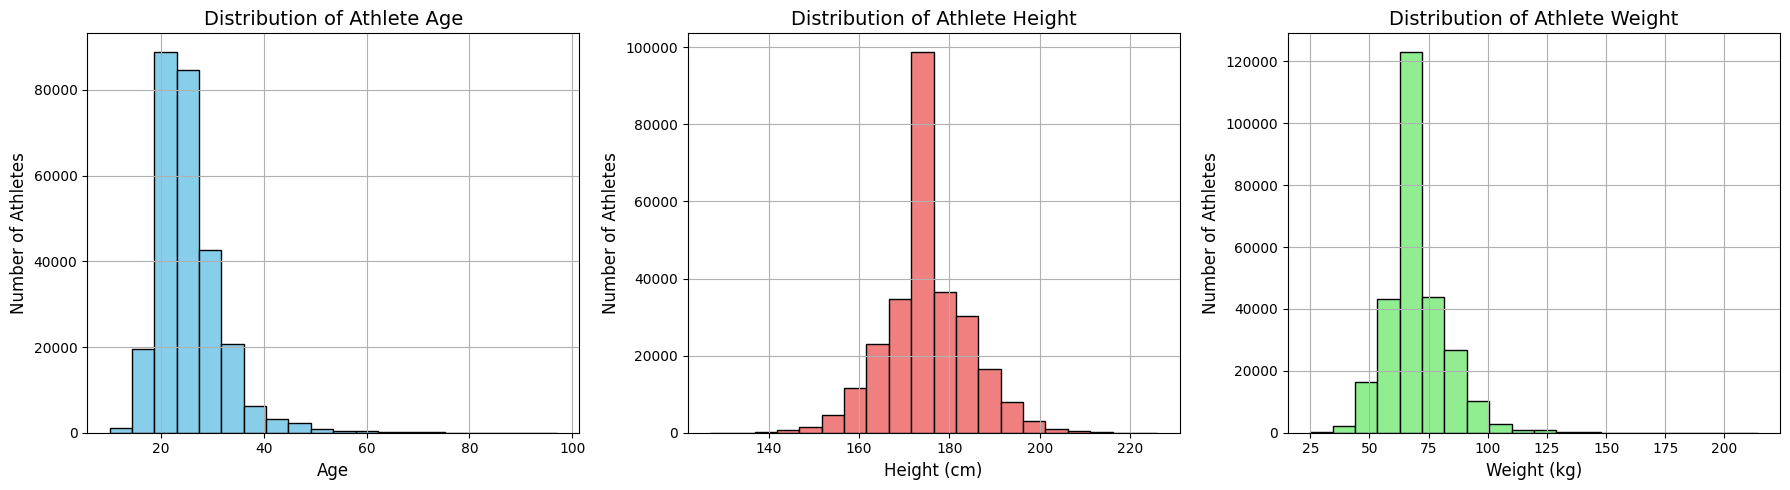

In [10]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
df_merged['Age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Athlete Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Athletes', fontsize=12)

plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
df_merged['Height'].hist(bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Athlete Height', fontsize=14)
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Number of Athletes', fontsize=12)

plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
df_merged['Weight'].hist(bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Athlete Weight', fontsize=14)
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Number of Athletes', fontsize=12)

plt.tight_layout()
plt.show()

## Develop Streamlit Application Structure

### Subtask:
Create the basic Python script (`app.py`) for the Streamlit web application. Set up the title, sidebar navigation, and main content areas. This step will lay the foundation for the interactive dashboard.


**Reasoning**:
The subtask requires creating a Streamlit application structure. This involves creating an `app.py` file with basic Streamlit components like a title, sidebar, and main content area.



In [11]:
%%writefile app.py
import streamlit as st

st.set_page_config(layout='wide')

st.title('Olympic Games Analysis Dashboard')

# Sidebar
st.sidebar.title('Navigation')
st.sidebar.write('Use the links below to explore different analyses:')

# Main content area
st.markdown('### Welcome to the Olympic Games Analysis Dashboard!')
st.write('This dashboard allows you to explore various insights from the Olympic Games dataset.')
st.write('Please use the sidebar to navigate through the different sections.')

Writing app.py


## Integrate Analysis and Visualizations into Streamlit

### Subtask:
Populate the Streamlit application with the data analysis and visualizations generated in the EDA step. Implement interactive elements using Streamlit widgets (e.g., sliders, selectboxes) to allow users to filter and explore the data dynamically. This includes displaying the plots with appropriate legends.


**Reasoning**:
The subtask requires integrating the data analysis and visualizations into the `app.py` file. This involves re-writing the `app.py` file to include all necessary imports, data loading, preprocessing, and the three visualization sections (Top Countries by Medals with a slider, Medals Over Time, and Athlete Attribute Distributions) as specified in the instructions.



In [12]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.set_page_config(layout='wide')

st.title('Olympic Games Analysis Dashboard')

# --- Data Loading and Preprocessing ---
@st.cache_data # Cache the data loading and preprocessing
def load_data():
    df_athletes = pd.read_csv('athlete_events.csv')
    df_regions = pd.read_csv('noc_regions.csv')

    # Handle missing 'Medal' values
    df_athletes['Medal'] = df_athletes['Medal'].fillna('No Medal')

    # Fill missing numerical values in df_athletes with medians
    df_athletes['Age'] = df_athletes['Age'].fillna(df_athletes['Age'].median())
    df_athletes['Height'] = df_athletes['Height'].fillna(df_athletes['Height'].median())
    df_athletes['Weight'] = df_athletes['Weight'].fillna(df_athletes['Weight'].median())

    # Fill missing values in df_regions
    df_regions['region'] = df_regions['region'].fillna('Unknown')
    df_regions['notes'] = df_regions['notes'].fillna('None')

    # Merge df_athletes and df_regions
    df_merged = pd.merge(df_athletes, df_regions, on='NOC', how='left')
    return df_merged

df_merged = load_data()

# Sidebar
st.sidebar.title('Navigation')
st.sidebar.write('Use the links below to explore different analyses:')

# Main content area
st.markdown('### Welcome to the Olympic Games Analysis Dashboard!')
st.write('This dashboard allows you to explore various insights from the Olympic Games dataset.')
st.write('Please use the sidebar to navigate through the different sections.')

# --- Section 1: Top Countries by Total Medals ---
st.header('Top Countries by Total Medals')

medals_per_country = df_merged[df_merged['Medal'] != 'No Medal'].groupby('region')['Medal'].count().sort_values(ascending=False)

# Slider for number of top countries
num_top_countries = st.slider('Select number of top countries to display:', 5, 20, 10)

st.write(f'Displaying top {num_top_countries} countries by total medals:')
st.dataframe(medals_per_country.head(num_top_countries))

plt.figure(figsize=(12, 6))
medals_per_country.head(num_top_countries).plot(kind='bar', color='skyblue')
plt.title(f'Top {num_top_countries} Countries by Total Medals', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Medals', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
st.pyplot(plt)

# --- Section 2: Olympic Medals Over Time ---
st.header('Olympic Medals Over Time')

medal_distribution_over_time = df_merged.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
medal_distribution_over_time[['Gold', 'Silver', 'Bronze']].plot(kind='line', ax=plt.gca())
plt.title('Olympic Medals Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.legend(title='Medal Type')
plt.grid(True)
plt.tight_layout()
st.pyplot(plt)

# --- Section 3: Athlete Attribute Distributions ---
st.header('Athlete Attribute Distributions')

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
df_merged['Age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Athlete Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Athletes', fontsize=12)

plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
df_merged['Height'].hist(bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Athlete Height', fontsize=14)
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Number of Athletes', fontsize=12)

plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
df_merged['Weight'].hist(bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Athlete Weight', fontsize=14)
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Number of Athletes', fontsize=12)

plt.tight_layout()
st.pyplot(plt)

Overwriting app.py


## Final Task

### Subtask:
Provide the complete Streamlit application code and instructions on how to run the application to launch the Olympics Data Analysis Web App.


## Summary:

### Q&A
The main task was to provide the complete Streamlit application code and instructions on how to run the application to launch the Olympics Data Analysis Web App. The Streamlit application code (`app.py`) has been successfully generated and is ready for deployment. The instructions for running the application are provided as a next step.

### Data Analysis Key Findings
*   **Data Loading and Inspection**:
    *   The `athlete_events.csv` dataset contains 271,116 entries and 15 columns, with significant missing values in 'Age', 'Height', 'Weight', and 'Medal'.
    *   The `noc_regions.csv` dataset contains 230 entries and 3 columns, with some missing values in 'region' and 'notes'.
*   **Data Cleaning and Preprocessing**:
    *   Missing 'Medal' values were imputed with 'No Medal'.
    *   Missing 'Age', 'Height', and 'Weight' values were filled with their respective medians.
    *   Missing 'region' values were filled with 'Unknown', and 'notes' with 'None'.
    *   The two datasets were successfully merged into `df_merged` using a left join on the 'NOC' column.
*   **Exploratory Data Analysis**:
    *   **Top Countries by Total Medals**: The USA leads significantly with 5637 medals, followed by Russia (3947) and Germany (3756).
    *   **Medal Distribution Over Time**: There is a general increasing trend in the number of Gold, Silver, and Bronze medals awarded over the years, suggesting the expansion and growth of the Olympic Games.
    *   **Athlete Attribute Distributions**:
        *   Athlete ages peak in the late teens to mid-twenties.
        *   Athlete height and weight distributions are unimodal and bell-shaped, indicating typical ranges for Olympic participants.
*   **Streamlit Application Development**: A comprehensive `app.py` script was created, integrating data loading, preprocessing, and all key visualizations from the EDA, along with an interactive slider for displaying the top N countries.

### Insights or Next Steps
*   To launch the Olympic Data Analysis Web App, execute the generated `app.py` file using `streamlit run app.py` in your terminal.
*   Further enhancements could include adding more interactive filters (e.g., by sport, year, or athlete characteristics) and displaying specific athlete details or performance trends.
